In [1]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from arch import arch_model

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [4]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(8):
        for d in range(8):
            for j in range(8):
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [5]:
sales_of_company_x = pd.read_csv("../1. Знакомство с временными рядами/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("../1. Знакомство с временными рядами/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("../1. Знакомство с временными рядами/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("../1. Знакомство с временными рядами/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("../1. Знакомство с временными рядами/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("../1. Знакомство с временными рядами/Series/daily-total-female-births-in-cal.csv")

all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [6]:
series = all_series["Monthly sales of company X"]

проверим ряд на стационарность

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


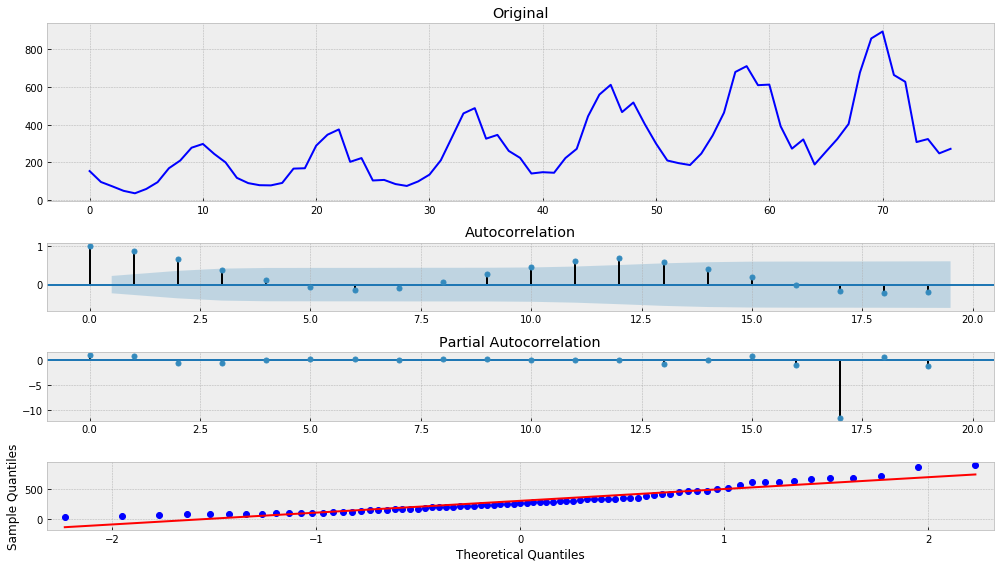

In [7]:
tsplot(series)

на графике мы видим сезонность и тренд. необходимо преобразовать ряд к стационарному

Results of Dickey-Fuller Test:
Test Statistic                -8.415213e+00
p-value                        2.052482e-13
#Lags Used                     3.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


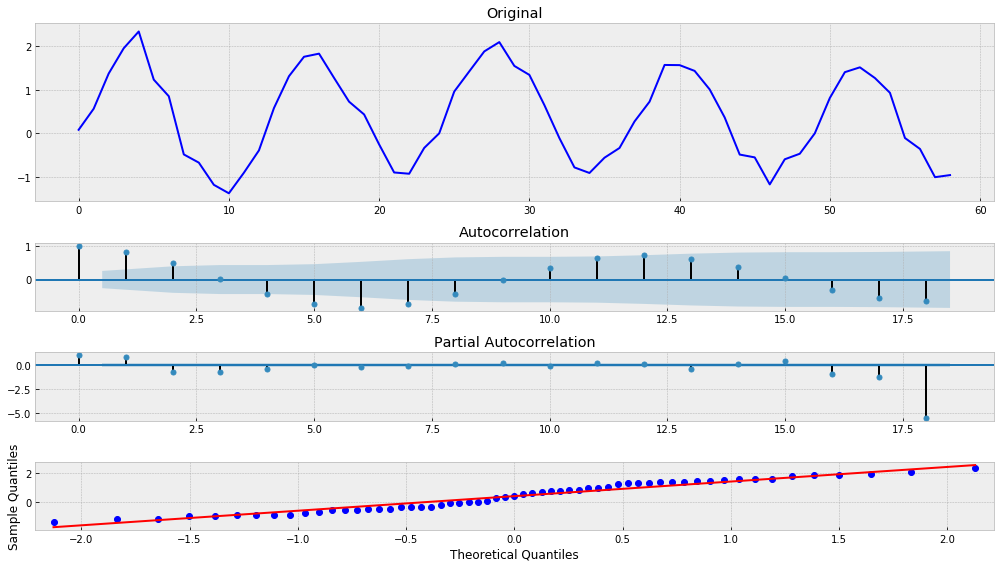

In [8]:
series = boxcox(series, 0)
series = series[18:] - series[:-18]
tsplot(series)

подберем лучшую модель ARIMA

In [9]:
aic, order, mdl = _get_best_model(series)

C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\Anaconda3\envs\netology\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


aic: 24.52951 | order: (7, 1, 0)


проверим, что модель хорошая, через оценку распреления для ошибок модели

Results of Dickey-Fuller Test:
Test Statistic                -6.172071e+00
p-value                        6.767457e-08
#Lags Used                     1.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


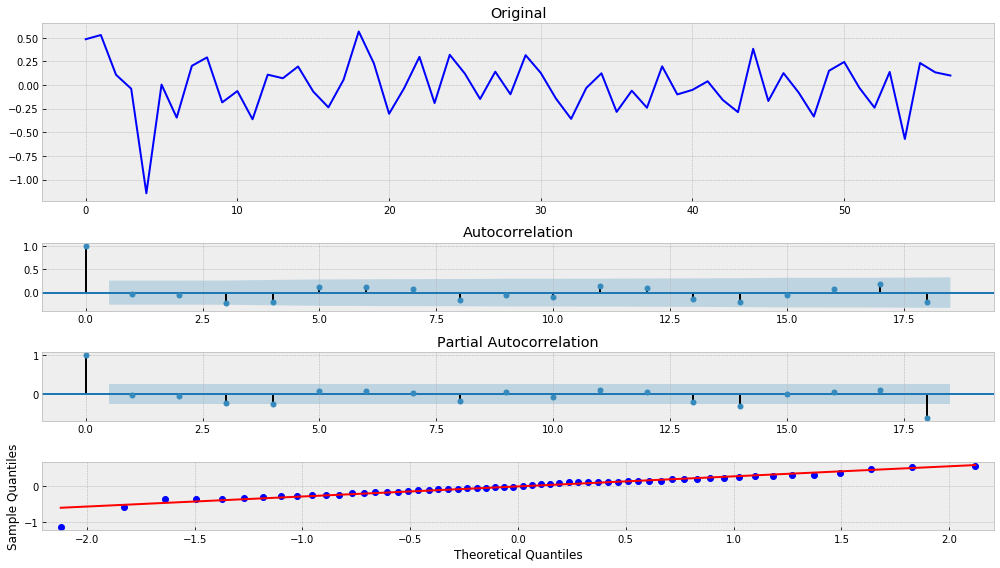

In [10]:
tsplot(mdl.resid)

остатки получились "хорошие". можем строить модель GARCH

In [11]:
p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     72,   Neg. LLF: 82.44131119760063
Iteration:     10,   Func. Count:    142,   Neg. LLF: 79.23772205111774
Iteration:     15,   Func. Count:    207,   Neg. LLF: 78.5727182513834
Iteration:     20,   Func. Count:    272,   Neg. LLF: 77.58359549803353
Iteration:     25,   Func. Count:    337,   Neg. LLF: 77.3061486734437
Iteration:     30,   Func. Count:    406,   Neg. LLF: 77.24197111908646
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 77.24197067195155
            Iterations: 30
            Function evaluations: 410
            Gradient evaluations: 30
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -77.2420
Distribution:      